In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
##Reading the data
data = pd.read_csv("Group2_movies.csv")
data

,movie Name,year,duration,genre,imdb_rating
0,Tasokare Hotel,2025,24m,"Animation, Fantasy, and more",7.3
1,Ghost Show,2024,22m,"Comedy, Mystery",7.3
2,Tarzan: The Epic Adventures,1996,45m,"Action, Drama, and more",6.1
3,Zatoichi monogatari,1974,45m,"Action, Adventure, and more",7.9
4,Hunter,1984,60m,"Action, Drama, and more",6.9
...,...,...,...,...,...
105,Cristiano Ronaldo: World at His Feet,2014,57m,"Documentary, Biography, and more",6.4
106,Close Encounters of the Fifth Kind,2020,2h,Documentary,6.1
107,Prescription Thugs,2016,85m,Documentary,6.9
108,SOMM: Into the Bottle,2015,1h 38m,Documentary,7.3


In [3]:

# Removing " and more" from the genre column
data['genre'] = data['genre'].str.replace(' and more', '', regex=False)


# Saving to a CSV
data = data.to_csv("cleaned_Group2_movies.csv", index=False)


In [4]:
data = pd.read_csv("cleaned_Group2_movies.csv")
data

,movie Name,year,duration,genre,imdb_rating
0,Tasokare Hotel,2025,24m,"Animation, Fantasy,",7.3
1,Ghost Show,2024,22m,"Comedy, Mystery",7.3
2,Tarzan: The Epic Adventures,1996,45m,"Action, Drama,",6.1
3,Zatoichi monogatari,1974,45m,"Action, Adventure,",7.9
4,Hunter,1984,60m,"Action, Drama,",6.9
...,...,...,...,...,...
105,Cristiano Ronaldo: World at His Feet,2014,57m,"Documentary, Biography,",6.4
106,Close Encounters of the Fifth Kind,2020,2h,Documentary,6.1
107,Prescription Thugs,2016,85m,Documentary,6.9
108,SOMM: Into the Bottle,2015,1h 38m,Documentary,7.3


In [5]:
##Checking for missing values
data.isna().sum()

movie Name     0
year           0
duration       0
genre          1
imdb_rating    4
dtype: int64

In [6]:
##Filling in missing values in genre
data["genre"] = data["genre"].ffill()
data.isna().sum()


movie Name     0
year           0
duration       0
genre          0
imdb_rating    4
dtype: int64

<Axes: xlabel='imdb_rating', ylabel='Count'>

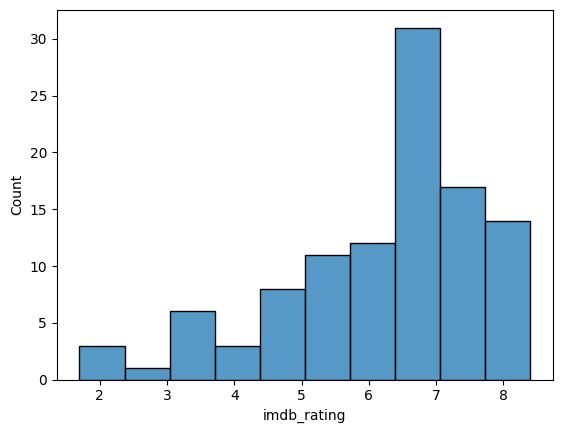

In [7]:
##Filling in the missing values in IMDB Rating 
sns.histplot(data["imdb_rating"])


In [8]:
data["imdb_rating"] = data["imdb_rating"].fillna(data["imdb_rating"].median())
data.isna().sum()

movie Name     0
year           0
duration       0
genre          0
imdb_rating    0
dtype: int64

In [15]:
#NUMBER 2)1)
genre_counts = data['genre'].str.get_dummies(sep=',').sum().sort_values(ascending=False)

#Displaying
print("Most common movie genres:")
print(genre_counts)

Most common movie genres:
Drama               18
Comedy              16
Documentary         14
 Drama              14
 Science Fiction    13
Horror              11
Animation            9
Reality              9
Action               8
 Adventure           8
 Comedy              7
Science Fiction      7
 History             7
 Fantasy             6
 Horror              6
 Romance             5
 Crime               3
 Action              3
Biography            3
Crime                3
 Thriller            3
 Family              3
Western              2
 Biography           2
Adventure            2
Family               2
Thriller             2
Romance              2
 Documentary         2
 Food                2
 Animation           1
 Music               1
 War                 1
 Reality             1
 Game Show           1
 Home and Garden     1
 Mystery             1
Fantasy              1
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_15480\1840775924.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


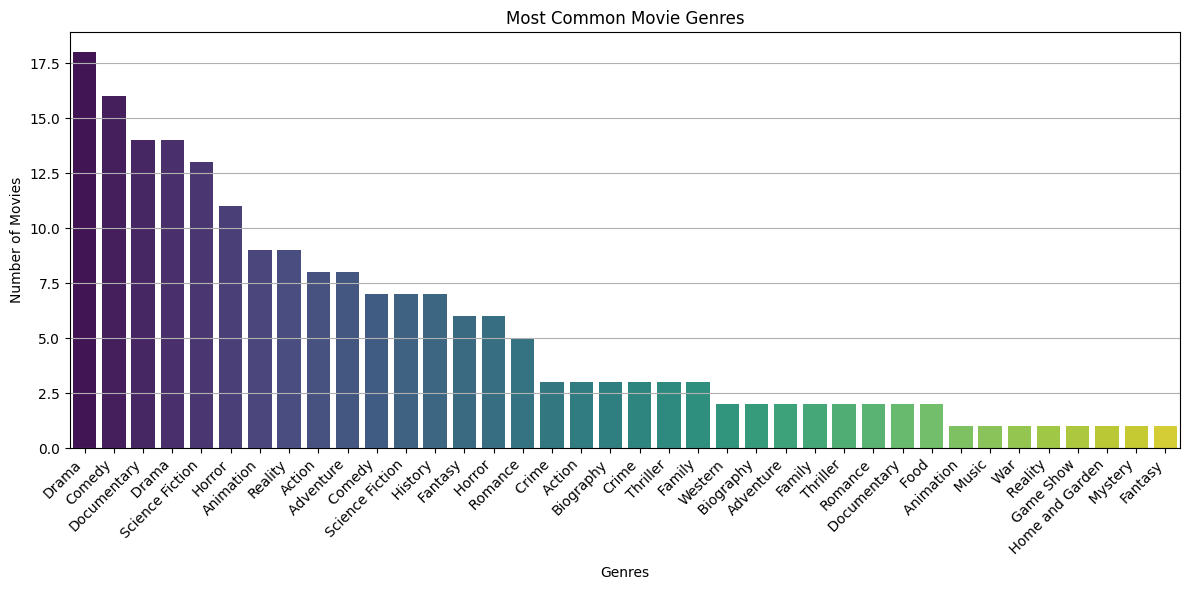

In [16]:

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Most Common Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [17]:
# 2)2) Average IMDb rating
# Calculating average IMDb rating
average_imdb_rating = data['imdb_rating'].mean()

print("\nAverage IMDb Rating:", average_imdb_rating)


Average IMDb Rating: 6.21132075471698


C:\Users\USER\AppData\Local\Temp\ipykernel_15480\3350400643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


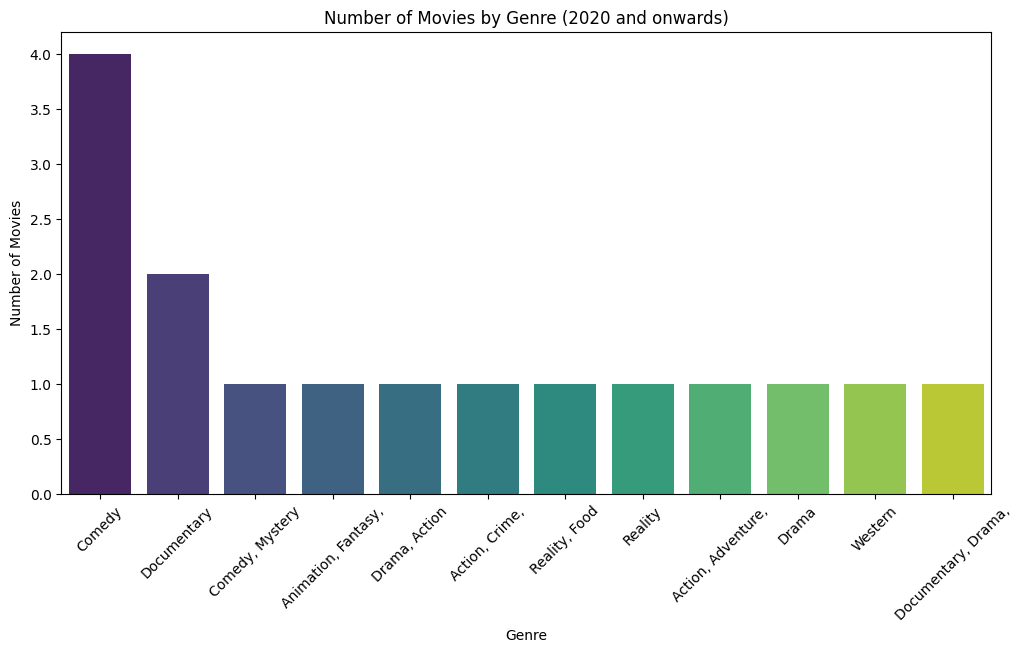

In [52]:
#Number 2)3)
# Filtering for recent releases (2020 and onwards)
recent_releases = data[data['year'] >= 2020]

# Counting the occurrences of each genre
genre_counts = recent_releases['genre'].value_counts()

# Creating visualizations
plt.figure(figsize=(12, 6))

# Create a bar plot using Seaborn
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

# Setting the labels and title
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre (2020 and onwards)')
plt.xticks(rotation=45) 

# Show the plot
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_15480\3144755914.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imdb_rating', y='movie Name', data=recent_releases, palette='viridis')


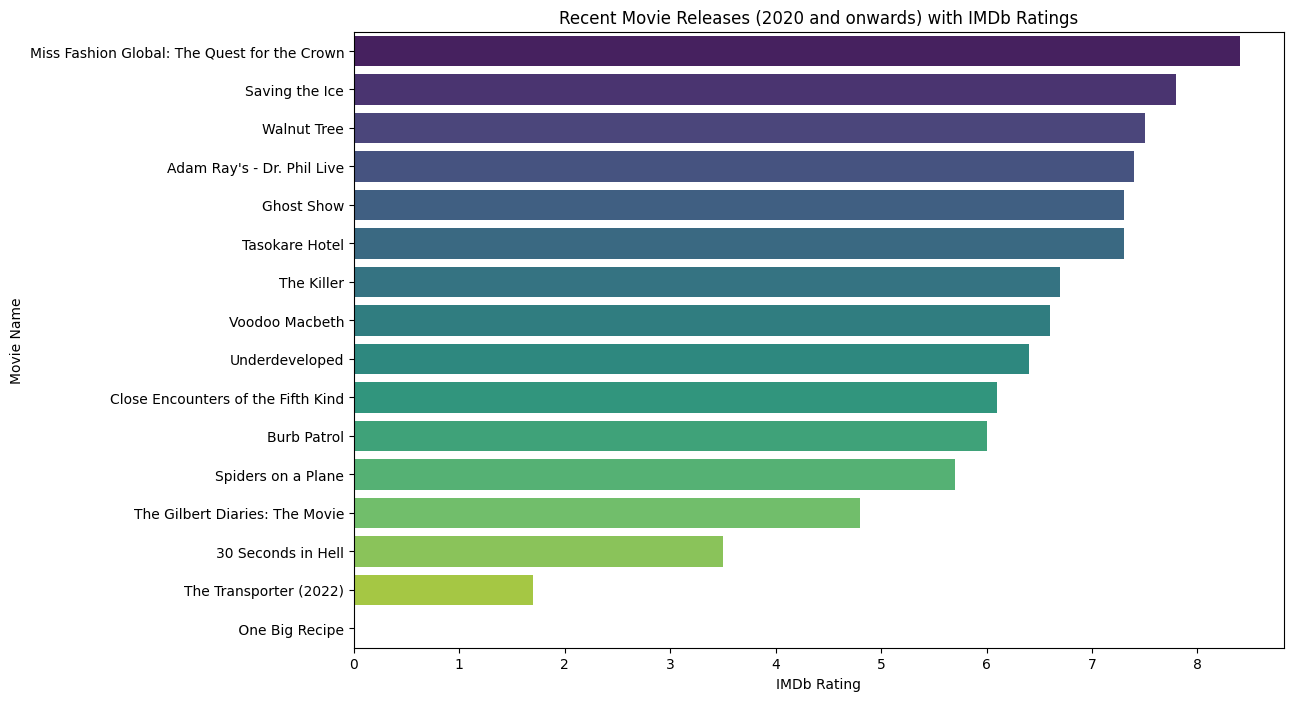

In [53]:
# Filtering for recent releases (2020 and onwards)
recent_releases = data[data['year'] >= 2020]

# Sorting by IMDb rating in descending order
recent_releases = recent_releases.sort_values(by='imdb_rating', ascending=False)

# Creating a figure and axis for the plot
plt.figure(figsize=(12, 8))

# Creating a bar plot using Seaborn for recent releases
sns.barplot(x='imdb_rating', y='movie Name', data=recent_releases, palette='viridis')

# Setting the labels and title
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Name')
plt.title('Recent Movie Releases (2020 and onwards) with IMDb Ratings')
plt.show()

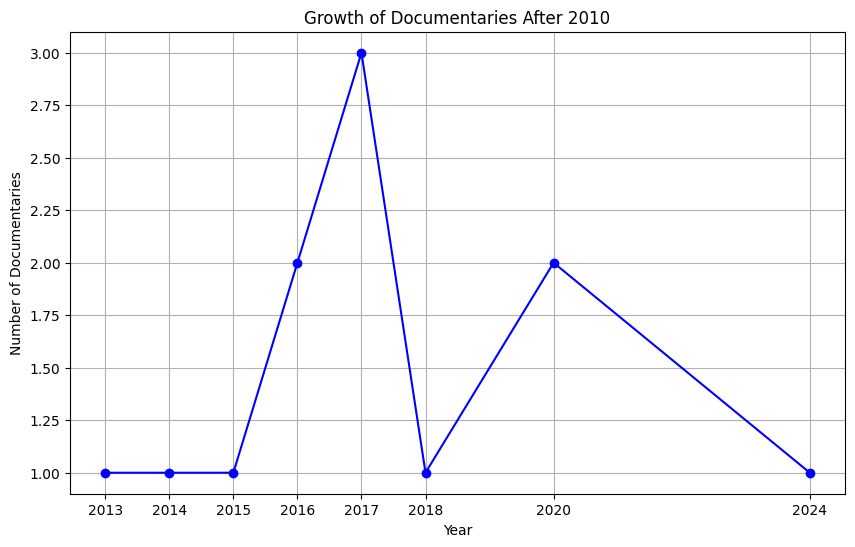

In [56]:
# Filtering for documentaries released after 2010
documentaries = data[(data['genre'].str.contains('Documentary', case=False, na=False)) & (data['year'] > 2010)]

# Counting the number of documentaries released each year
doc_growth = documentaries['year'].value_counts().sort_index()

# Creating a simple line plot
plt.figure(figsize=(10, 6))
plt.plot(doc_growth.index, doc_growth.values, marker='o', color='blue')

# Setting the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Documentaries')
plt.title('Growth of Documentaries After 2010')
plt.xticks(doc_growth.index) 
plt.grid()

plt.show()

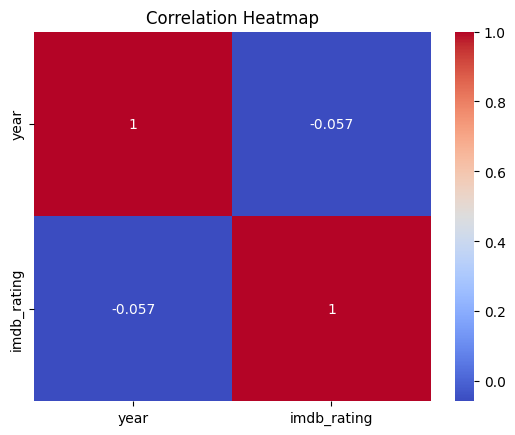

imdb_rating    1.000000
year          -0.057325
Name: imdb_rating, dtype: float64


In [55]:
#Number 3
# Converting relevant columns
data['year'] = pd.to_numeric(data['year'], errors='coerce')
data['imdb_rating'] = pd.to_numeric(data['imdb_rating'], errors='coerce')

# Computing correlation matrix
corr = data[['year', 'imdb_rating']].corr()

# Visualizing using heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Printing highest correlation with IMDb Rating
print(corr['imdb_rating'].sort_values(ascending=False))
